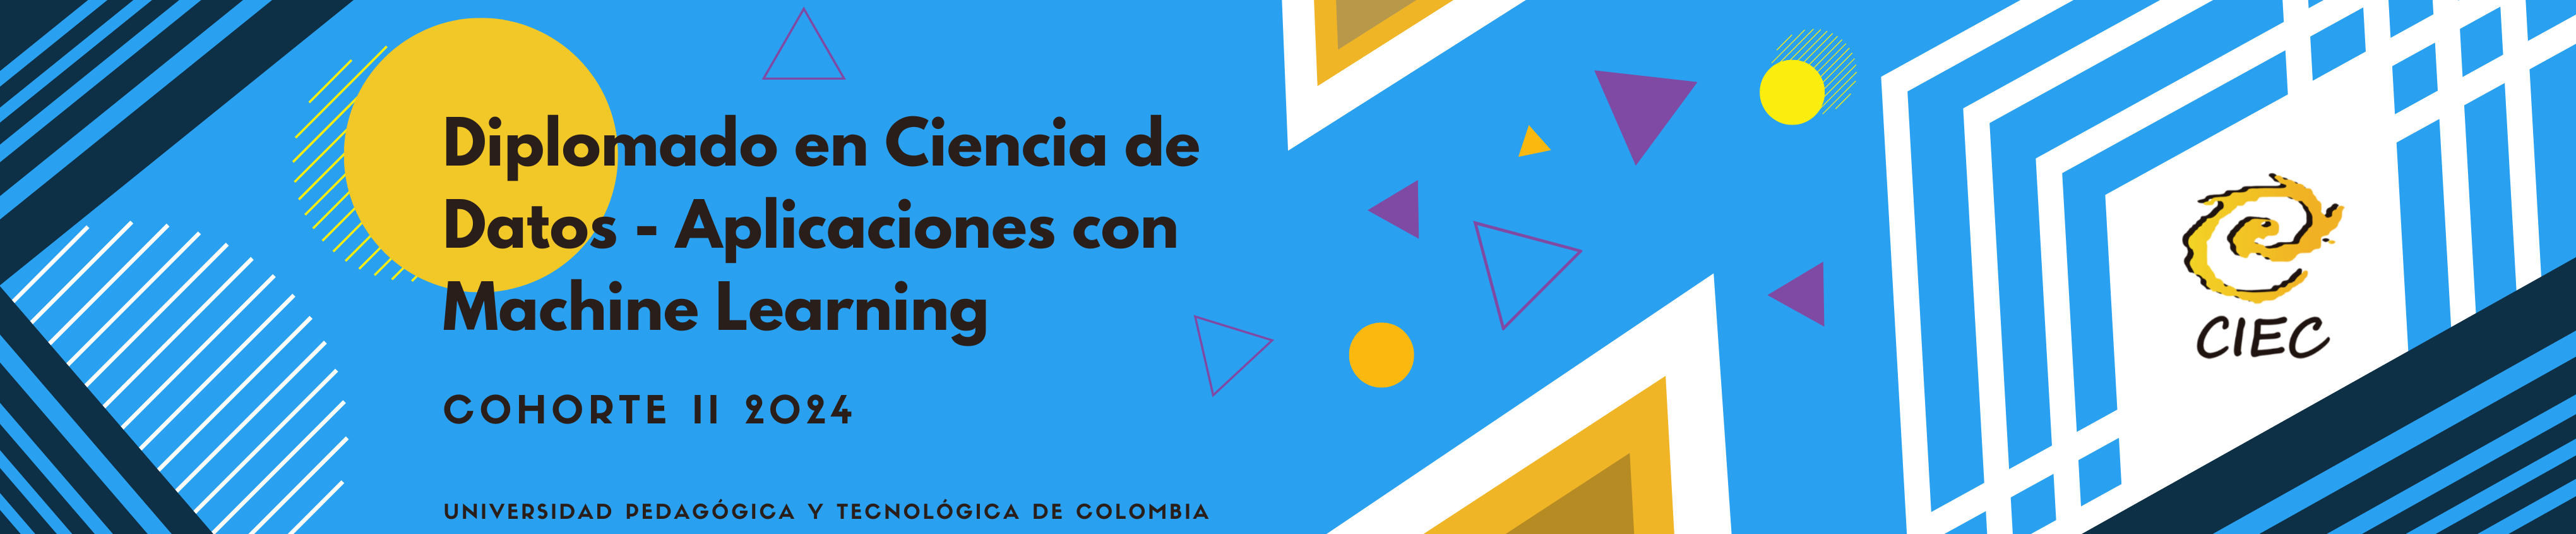

<!-- Main Title -->

**<h1 style="color: #FECB05; text-align: center;"> Curso: Fundamentos de Cálculo Diferencial </h1>**

---

**<h2 style="color: #007ACC;">Autores</h2>**

- [Nicolás Castillo Ojeda](https://www.linkedin.com/in/nicolas-castillo-ak/)

---

<!-- Table of Contents -->
**<h2 style="color: #007ACC;">Tabla de contenido</h2>**

- [<span style="color: #005C99;">1. Cálculo Diferencial Univariado</span>](#section1)
  - [<span style="color: #003366;">1.1. Funciones</span>](#subsection11)
  - [<span style="color: #003366;">1.2. Diferenciación</span>](#subsection12)
      - [<span style="color: #003366;">1.2.1. Concepto de Derivada y Reglas de Derivación</span>](#subsection121)
      - [<span style="color: #003366;">1.2.2. Diferenciación Simbólica</span>](#subsection122)
      - [<span style="color: #003366;">1.2.3. Diferenciación Numérica</span>](#subsection123)
- [<span style="color: #005C99;">2. Descenso del Gradiente</span>](#section2)
  - [<span style="color: #003366;">2.1. Descenso del Gradiente en una Variable</span>](#subsection21)
  - [<span style="color: #003366;">2.2. Descenso del Gradiente en más de una Variable</span>](#subsection22)
- [<span style="color: #005C99;">3. Regresión Lineal</span>](#section3)
  - [<span style="color: #003366;">3.1. Función de Costo</span>](#subsection31)
  - [<span style="color: #003366;">3.2. Optimización de la Función de Costo</span>](#subsection32)

---

**<h2 style="color: #007ACC;">Introducción</h2>**


Bienvenido al curso de "*Fundamentos de Cálculo Diferencial*". Durante esta experiencia educativa, nos sumergiremos en los conceptos y técnicas fundamentales del Cálculo Diferencial, donde exploraremos su importancia y aplicación dentro sel Machine Learning y a través de ejemplos sencillos, se ilustrará cómo la optimización de sistemas costituye el eje central del ésta disciplina. Aprenderemos a implementar algoritmos de optimización en una y múltiples variables lo cuál nos permitirá implementar desde cero, un modelo predictivo simple.

---

**<h2 style="color: #007ACC;">Dependencias</h2>**

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.optimize import minimize
import matplotlib.pyplot as pls
from sklearn.model_selection import train_test_split

In [2]:
# Utilidades
import os
import sys

# Directorio actual
current_dir = os.getcwd()

# Directorio padre
utils_dir = os.path.join(current_dir, os.pardir, 'utils')
sys.path.append(utils_dir)

# importación de graficadores
from graficadores import * 

In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# <!-- Section 1 -->
**<h2 id="section1" style="color: #007ACC;">1. Cálculo Diferencial Univariado</h2>**

### <!-- Subsection 1.1 -->
**<h3 id="subsection11" style="color: #003366;">1.1. Funciones</h3>**


---
Funciones


---





Las funciones son conceptos fundamentales en matemáticas y desempeñan un papel crucial en la modelación y resolución de problemas en diversos campos de la ciencia y la ingeniería. Una función establece una correspondencia entre elementos de dos conjuntos, asignando a cada elemento de uno (`dominio`) exactamente un elemento del otro (`contradominio`). En términos más simples, es como una "máquina" que toma una entrada y produce una salida.

**Definición de Función:**
* Una función, denotada comúnmente como $f(x)$, relaciona cada valor de $x$ en su dominio con un ***único valor*** correspondiente de $y$ en su contradominio. La notación $y=f(x)$ significa que $y$ es la imagen de $x$ bajo la función $f$. En otras palabras, para cada $x$ en el dominio de $f$, hay exactamente un $y$ asociado.

**Elementos clave**
* Dominio: Conjunto de todos los valores de entrada válidos.
* Contradominio: Conjunto de todos los valores de salida posibles.
* Imagen: Conjunto de todos los valores de salida reales.

Las funciones son relaciones que nos permíten describir un fenómeno en términos de sus características para predecir el posible comportamiento del mísmo con base a éstas, son el mecanísmo escencial de modelamiento que se emplea en áreas del conocimiento como la física, las matemáticas, la economía, la biología, la ingeniería y la inteligencia artificial. En el cálculo diferencial, se exploran las tasas de cambio, pendientes de curvas y cómo estas variables afectan a los sistemas.





A continuación se muéstra cómo una función exponencial modela el crecimiento de una población a lo largo del tiempo.

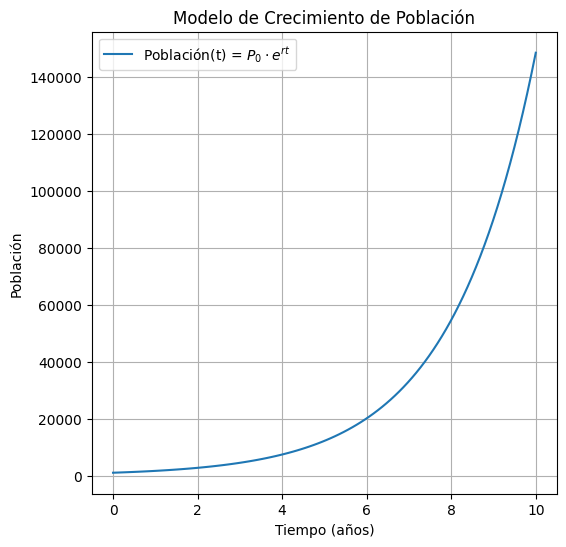

In [5]:
# Representación de un sistema que representa el crecimiento poblacional

def poblacion(t, P0, r):
    """
    Función que modela el crecimiento de una población.

    Parametros:
    - t: tiempo
    - P0: población inicial
    - r: tasa de crecimiento
    """
    return P0 * np.exp(r * t)

# Definir parámetros
tiempo = np.linspace(0, 10, 100)
poblacion_inicial = 1000
tasa_crecimiento = 0.5

# Calcular los valores de población para cada tiempo

x = tiempo
y = poblacion(tiempo, poblacion_inicial, tasa_crecimiento)

titulo ='Modelo de Crecimiento de Población'
x_label = 'Tiempo (años)'
y_label = 'Población'
legend ='Población(t) = $P_0 \cdot e^{rt}$'

# Graficar la función
graficar_función(x, y, titulo, x_label, y_label, legend)

A continuación se muéstra una función coseno multiplicada por una función exponencial, modelo el cual describe una osción amortiguada.

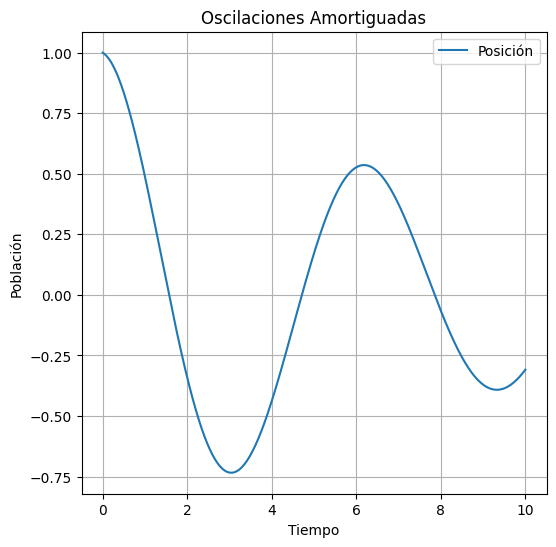

In [11]:
# Dimensiones de la matrix y el vector solución

import numpy as np
import matplotlib.pyplot as plt

def solucion_amortiguada(t, A, omega_d, phi, c, m):
    """
    Calcula la solución de la ecuación diferencial amortiguada para un tiempo dado.

    Parameters:
    - t: tiempo
    - A: amplitud inicial
    - omega_d: frecuencia angular amortiguada
    - phi: fase inicial
    - c: coeficiente de amortiguamiento
    - m: masa del objeto
    """
    exponente = -c / (2 * m) * t
    return A * np.exp(exponente) * np.cos(omega_d * t + phi)

# Definir parámetros
A = 1.0         # Amplitud inicial
omega_d = 1.0   # Frecuencia angular amortiguada
phi = 0.0       # Fase inicial
c = 0.2         # Coeficiente de amortiguamiento
m = 1.0         # Masa del objeto

# Generar valores de tiempo
tiempo = np.linspace(0, 10, 1000)

# Calcular los valores de posición para cada tiempo
posicion = solucion_amortiguada(tiempo, A, omega_d, phi, c, m)

titulo ='Oscilaciones Amortiguadas'
x_label =  'Tiempo'
y_label = 'Población'
legend ='Posición'

# Graficar la función
graficar_función(tiempo, posicion, titulo, x_label, y_label, legend)


### <!-- Subsection 1.2 -->
**<h3 id="subsection12" style="color: #003366;">1.2. Diferenciación</h3>**

---
Definición de la derivada como aproximación lineal

---


La derivada es un concepto fundamental en el campo del cálculo diferencial, una rama crucial de las matemáticas que se ocupa de entender y analizar la variación de las funciones. Esta noción es esencial para modelar y comprender una amplia variedad de fenómenos en la física, la ingeniería, la economía y otras disciplinas científicas ya que de por si, es un concepto matemático relacionado con las * **proporciones de cambio** * de una variable $y$ con respecto a $x$. Por ejemplo, algúnos casos de uso son:
* ***Física:***En cinemática, la derivada de la posición con respecto al tiempo da la velocidad instantánea, y la segunda derivada da la aceleración. Esto se extiende a problemas más complejos, como la dinámica de fluidos y la transferencia de calor.

* ***Economía:***En teoría económica, la derivada modela tasas marginales, como la tasa marginal de utilidad o la tasa marginal de producción. Esto es esencial para la optimización en la toma de decisiones.

* ***Ingeniería:*** En ingeniería eléctrica y mecánica, las derivadas se utilizan para analizar circuitos, sistemas de control y diseñar estructuras resistentes.

* ***Biología:***En biología, la derivada modela tasas de crecimiento y propiedades cinéticas de reacciones bioquímicas.

* ***Inteligencia Artificial y Ciencia de Datos:*** En éstas disciplinas, el cálculo diferencial es empleado para determinar la solución de problemas de optimización cuya salida, corresponde al modelo que más se ajusta/explica el comportamiento de los datos. Constituye el pilar escencial bajo el cual el modelamiento de datos se sustena.

Conceptualmente, una derivada de una funcipn $f(x)$ se define como:

$$
derivada(f(x)) = \frac{\Delta f}{\Delta x}
$$

En donde $\Delta f$ y $\Delta x$ representan el cambio de los valores de $f$ y $x$ respectivamente. Esto quiere decir que $derivada(f)$ es la proporción entre el cambio que tiene la función con respecto a un cambio de su variable independiente.

Formalmente, la derivada de una función $f(x)$ en un punto $x_0$ se define como el límite, si existe, de la razón de cambio promedio de la función en un intervalo pequeño alrededor de $x_0$​, cuando la longitud de ese intervalo tiende a cero. Matemáticamente, la derivada de  $f(x)$ se denota como:

$$
f´(x) = \frac{df}{dx}
$$

Y se expresa como:

$$
\frac{df}{dx} = \lim_{{\Delta x \to 0}} \frac{\Delta f}{\Delta x}
$$

La deducción de la derivada se basa en la idea de calcular la tasa de cambio instantánea de una función en un punto específico. Consideremos una función $f(x)$ donde un cambio en x viene denotado por $\Delta x = x_1 - x_0$ en donde $x_0$ y $x_1$ son dos valores de para la variable $x$ dentro del rango permitido. Así si remplazamos éstos valores en $f$ obtenemos $\Delta f = f(x_1) - f(x_0)$, expresiones generalizables a que dado un valor arbitrario de $x$, el cambio constante en $x$ se denota como $\Delta x = h$ mientras que el cambio en $f$ viene dado por $\Delta f = f(x_0 + h) - f(x_0)$.

$$$$
$$
\frac{df}{dx} = \lim_{{h \to 0}} \frac{f(x + h) - f(x)}{h}
$$

De éste modo, la expresión anterior indica que a medida que $h$ se acerca a cero, estamos tomando un intervalo cada vez más pequeño alrededor de $x_0$.

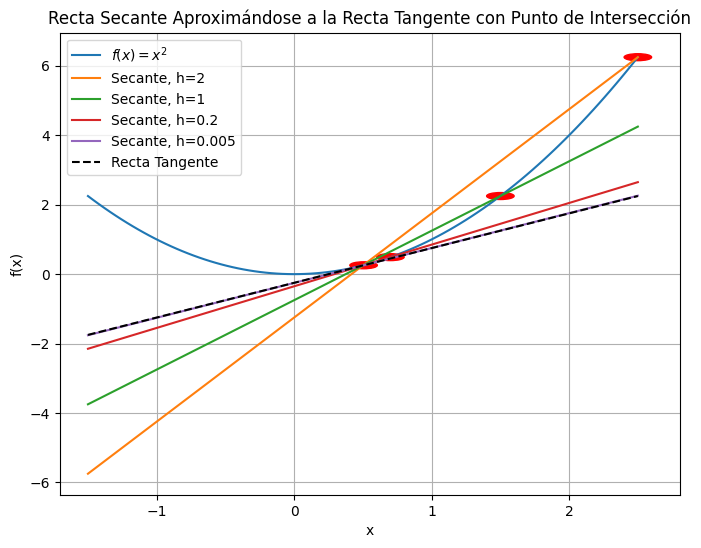

In [12]:
# Definición del concepto de derivada

def f(x):
    return x**2

def derivada(x):
    return 2*x

# Punto de interés y rango de x
x0 = 0.5
x_values = np.linspace(x0 - 2, x0 + 2, 100)

# Cálculo de y = f(x)
y_values = f(x_values)

#----------- Definimos la recta tangente -----------
def tangente(x):
  m = derivada(x0)
  b = f(x0)
  return  (x - x0)*m + b

#----------- Definimos la recta secante -----------
def secante(x, h):
  m = ((f(x0 + h) - f(x0)) / h)
  b = f(x0)
  return  (x - x0) * m + b



# Valores de h para la recta secante
h_values = [2, 1, 0.2, 0.005]


# Graficar la función y las rectas secantes
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = x^2$')

for h in h_values:
    secante_values = secante(x_values, h)
    plt.plot(x_values, secante_values, label=f'Secante, h={h}')

    # Encontrar el punto de intersección
    intersection_x = x0 + h
    intersection_y = secante(intersection_x, h)

    # Agregar un círculo en el punto de intersección
    circle = Circle((intersection_x, intersection_y), 0.1, color='red', fill=True)
    plt.gca().add_patch(circle)

# Agregar la recta tangente
tangente_values = tangente(x_values)
plt.plot(x_values, tangente_values, label='Recta Tangente', linestyle='--', color='black')

# Configurar la leyenda y mostrar la gráfica
plt.title('Recta Secante Aproximándose a la Recta Tangente con Punto de Intersección')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Geométricamente, la derivada en un punto $x_i$ representa la inclinación de la recta tangente a la curva de $f$ en ese punto. Si consideramos el gráfico de la función, la derivada indica la tasa de cambio instantánea de $f$ evaluada en $x_i$, es decir, cuánto está cambiando la variable dependiente respecto a la variable independiente en ese punto específico.

En pocas palabras, ***la derivada corresponde a la mejor aproximación lineal de una función en un punto dado.***

---
Reglas de derivación

---

Las reglas de derivación son un conjunto de principios matemáticos que describen cómo calcular la derivada de una función en cálculo diferencial. Las reglas de derivación son formas de manipular la función original que permitan deducir analíticamente la forma de su derivada sin tener que recurrir a la definición formal de la derivada expuésta anteriormente. Estas son:

* ***Regla de la derivada de una constante***
$$
\frac{d}{dx}(c) = 0
$$

* ***Regla de la potencia***
$$
\frac{d}{dx}(x^n) = nx^{n-1}
$$

* ***Regla de la suma de funciones***
$$
\frac{d}{dx}(f(x) + g(x)) = \frac{d}{dx}f(x) + \frac{d}{dx}g(x)
$$

* ***Regla del producto***
$$
\frac{d}{dx}(f(x) \cdot g(x)) = f'(x)g(x) + f(x)g'(x)
$$

* ***Regla del cociente***
$$
\frac{d}{dx}\left(\frac{f(x)}{g(x)}\right) = \frac{f'(x)g(x) - f(x)g'(x)}{(g(x))^2}
$$


* ***Regla de la cadena***
$$
\frac{d}{dx}f(g(x)) = f'(g(x)) \cdot g'(x) = \frac{df}{dg} \frac{dg}{dx}
$$


* *** Derivada de un exponencial***
$$
\frac{d}{dx}(e^x) = e^x
$$

* ***Derivada del logaritmo natural***
$$
\frac{d}{dx}(\ln(x)) = \frac{1}{x}
$$

Para decir que una función es derivable o que tiene derivada en cierto punto concreto, ésta debe cumplir las siguientes propiedades:

* ***Continuidad:*** La función debe ser contiua en el punto o intervalo en el que se está evaluando la derivada, es decir, la función deebe ser contínua y no presentar saltos.
* ***Suavidad:*** La función debe ser suave, lo que quiere decir que los cambios en los valores de $f(x)$ no deben ocurrir de manera abrúpta, lo que implica que en la presencia de "picos" o saltos abrúptos, la derivada es ambígua.
* ***Existencia de los límites laterales:*** Implica que el límite por izquierda y por derecha deben coincidir en el mísmo punto, ésto evita que exístan saltos discontínuos en una función.

### <!-- Subsection 1.2.1 -->
**<h3 id="subsection121" style="color: #003366;">1.2.1. Diferenciación Simbólica</h3>**

---
Diferenciación simbólica

---

La derivación simbólica se refiere al proceso de calcular derivadas de funciones mediante el uso de símbolos matemáticos en lugar de valores numéricos específicos. En lugar de trabajar con valores concretos, se manipulan expresiones algebraicas que representan funciones simbólicamente. Este enfoque permite realizar cálculos de derivadas sin necesidad de conocer los valores numéricos específicos de las variables.

La derivación simbólica es una característica común en software de matemáticas simbólicas y sistemas de álgebra computacional. Ejemplos de herramientas que realizan derivación simbólica incluyen Mathematica, Maple, y SymPy en Python.

A continuación, veámos como diferenciar simbólicamente en Python.

In [4]:
# Función simbólica con Sympy

from sympy import *

x, y = symbols('x y')
f = 2 * x**3 - x * y
f

2*x**3 - x*y

In [5]:
# Manipulación simbólica
f_manip = x * (f + x * y + x**3)
f_manip


3*x**4

In [6]:
# Expansión de una expresión simbólica
f_expanded = expand(f_manip)
f_expanded

3*x**4

In [16]:
# Evaluación de una expresión simbólica
f.evalf(subs={x:4, y:2})

120.000000000000

In [17]:
# Función cuadrática
f_symb = x ** 2
f_symb.evalf(subs={x:3})

9.00000000000000

No obstante, el manejo de expresiones simbólicas no permite evaluar simultáneamente valores de un array.

In [18]:
# Evaluación de un array
x_array = np.array([1,2,3,4])
try:
    f_symb(x_array)
except TypeError as err:
    print(err)

'Pow' object is not callable


Para evaluar arrays de números dentro de expresiones simbólicas, primero hay que hacer compatible las expresiones con Numpy. Para ello, se emplea el siguiente código.

In [19]:
# Compatibilidad de expresiones simbólicas con numpy
from sympy.utilities.lambdify import lambdify

x = symbols('x')
f_symb = x ** 2
f_symb_numpy = lambdify(x, f_symb, 'numpy')

x_array = np.array([1,2,3,4,5])
print("x: \n", x_array)
print("f(x) = x**2: \n", f_symb_numpy(x_array))

x: 
 [1 2 3 4 5]
f(x) = x**2: 
 [ 1  4  9 16 25]


Para diferenciar numéricamente, empleamos las funcionalidades nativas de SumPy.

In [20]:
# Ejemplo de diferenciación numérica
x, y, z = symbols('x y z')

derivada = diff(cos(x), x)
derivada

-sin(x)

In [21]:
# Ejemplo de diferenciación numérica
dfdx_composed = diff(exp(-2*x) + 3*sin(3*x), x)
dfdx_composed

9*cos(3*x) - 2*exp(-2*x)

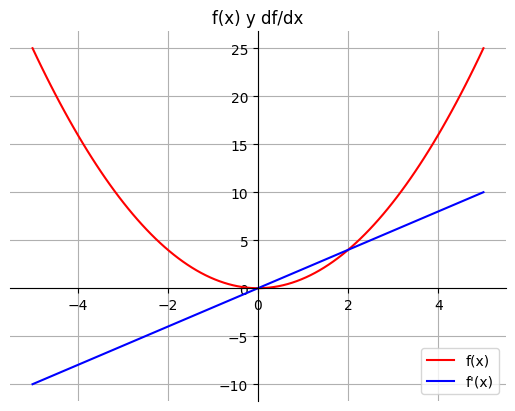

In [28]:
# Ejemplo gráfico de una función y su derivada
x = symbols('x')
f = x ** 2
dfdx = diff(f,x)

f = lambdify(x, f, 'numpy')
dfdx = lambdify(x, dfdx, 'numpy')
plot_f1_and_f2(f, dfdx)

---
Algúnas limitaciones de la diferenciación simbólica

---

A pesar de que `SymPy` es una herramienta poderosa para calcular las diferenciaciones simbólicas, posee algúnas limitaciónes y no siempre será el mejor camino para hallar la expresión de una derivada.

Epecíficamente, la diferenciación simbólica por métodos computacionales puede arrojar expresiones muy complicadas incluso aún más que la verdadera expresión analítica. Por ejemplo observe el caso de:

$$\left|x\right| = \begin{cases} x, \ \text{if}\ x > 0\\  -x, \ \text{if}\ x < 0 \\ 0, \ \text{if}\ x = 0\end{cases}$$

Cuya derivada analítica es:

$$\frac{d}{dx}\left(\left|x\right|\right) = \begin{cases} 1, \ \text{if}\ x > 0\\  -1, \ \text{if}\ x < 0\\\ \text{does not exist}, \ \text{if}\ x = 0\end{cases}$$

In [29]:
# Ejemplo de diferenciación simbólica complicada para funciones simples
dfdx_abs = diff(abs(x),x)
dfdx_abs

(re(x)*Derivative(re(x), x) + im(x)*Derivative(im(x), x))*sign(x)/x

In [30]:
# Validación del valor de la derivada
dfdx_abs.evalf(subs={x:-2})

-Subs(Derivative(re(x), x), x, -2)

No obstante, incluso aunque ésta expresión complicada pueda arrojar un valor numérico correcto, cuando se incorpora con Numpy puede arrojar errores.

In [31]:
# Incompatibilidad con arrays
dfdx_abs_numpy = lambdify(x, dfdx_abs,'numpy')

try:
    dfdx_abs_numpy(np.array([1, -2, 0]))
except NameError as err:
    print(err)

name 'Derivative' is not defined


#### <!-- Subsection 1.2.2 -->
**<h3 id="subsection121" style="color: #003366;">1.2.2. Diferenciación Numérica</h3>**

---
Diferenciación numérica

---

La diferenciación numérica es un método computacional utilizado para aproximar la derivada de una función mediante el uso de valores numéricos discretos. En lugar de depender de fórmulas analíticas, la diferenciación numérica se basa en la evaluación de la función en puntos discretos para estimar la tasa de cambio instantánea. Éste método constituye una aproximación numérica de la derivada tal que $\frac{df}{dx}\approx\frac{f\left(x + \Delta x\right) - f\left(x\right)}{\Delta x}$ donde ésta aproximación se ejecuta formalmente mediante la expresión:

$$
f´(x_i)=\frac{df(x)}{dx}\big|_{x=x_i}\approx\frac{f\left(x_{i+1}\right) - f\left(x_i\right)}{x_{i+1} - x_i}
$$

Éste método de diferenciación aproximada es conocido como ***diferencias finitas***.

In [35]:
# Método de diferencias finitas

def num_der(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x) - 1
    delta_y_delta_x = np.empty(n)

    for i in range(n):
        delta_x = x[i + 1] - x[i]
        delta_y = y[i + 1] - y[i]
        delta_y_delta_x[i] = delta_y / delta_x

    return delta_y_delta_x

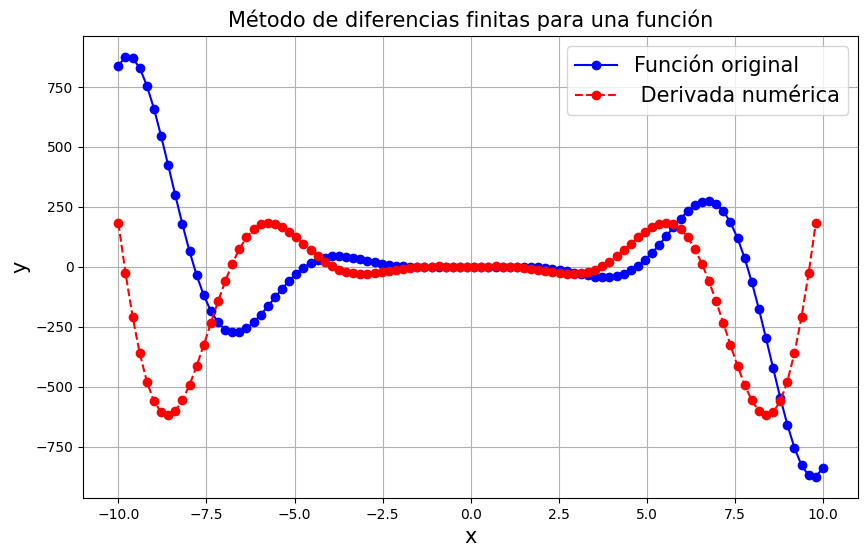

In [44]:
# Aplicación del método de diferencias finitas

x = np.linspace(-10,10,100)
f = x**3*np.cos(-x)
dfdx = num_der(x, f)

titulo = 'Método de diferencias finitas para una función'
label_1 = "Función original"
label_2 = " Derivada numérica"
# Grafiación de la función
plot_num_der(x,f, dfdx, titulo, label_1, label_2)

Aunque la diferenciación numérica es una herramienta útil en muchos contextos, también presenta varios problemas y desafíos que deben ser considerados:

* ***Error Numérico y sensibilidad al ruido:*** La diferenciación numérica introduce errores debido a la precisión finita de los números en la computadora. Pequeños errores en las aproximaciones pueden acumularse y afectar la precisión de los resultados. Por otra parte, si la función contiene ruido o fluctuaciones significativas, la diferenciación numérica puede ser sensible a estos efectos, generando resultados no representativos de la verdadera tasa de cambio.

* ***Elección del Tamaño de Paso:***La elección del tamaño de paso $h$ es crítica. Un $h$ demasiado pequeño puede resultar en errores de redondeo, mientras que un $h$ demasiado grande puede llevar a aproximaciones inexactas de la derivada.

# <!-- Section 2 -->
**<h2 id="section2" style="color: #007ACC;">2. Descenso del Gradiente</h2>**

---
Descenso del gradiente y mínimos de una función

---

El descenso del gradiente es una técnica fundamental en el campo de la optimización numérica, ampliamente utilizada para encontrar el mínimo local de funciones. Este algoritmo es esencial en disciplinas como el aprendizaje automático y la inteligencia artificial, donde la optimización de parámetros es crucial para entrenar modelos de manera efectiva. Exploraremos en detalle qué es el descenso del gradiente y sus características clave.

* ***Optimización de funciones:*** El descenso del gradiente se aplica a funciones que buscan minimizar o maximizar un valor. Su objetivo principal es encontrar el mínimo local de una función.

* ***Gradiente y Dirección descendente:*** El gradiente de una función es un vector que apunta en la dirección de mayor cambio. En el descenso del gradiente, nos movemos en la dirección opuesta al gradiente para minimizar la función.

Un mínimo global corresponde al valor de $f(x)$ de menor valor dentro de las imáges generadas en el rango de definición de la función, mientras que un mínimo local es un valor de la función en donde todos los puntos cercanos a éste son de mayor valor, es decir, es el lugar donde la función alcanza un valor mínimo localmente en comparación con su entorno inmediato.

Una propiedad que comparten tanto los mínimos locales, globales y máximos locales y globales es que en éstos puntos la derivada toma un valor igual a cero ya que la pendiente de la recta tangente es nula.

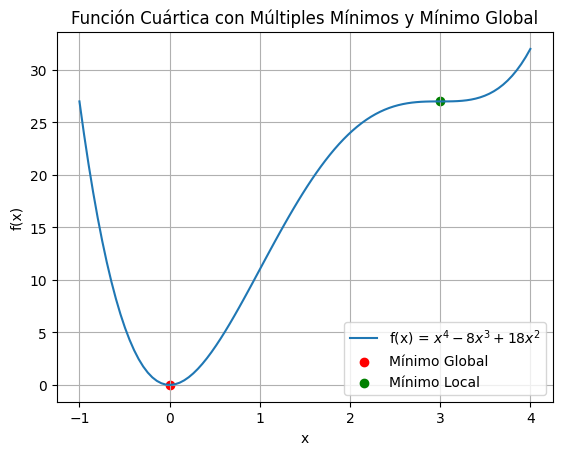

In [45]:
# Ejemplo de mínimo local y mínimo global
ejemplo_de_minimos()

Para hallar mínimos de una función analíticamente, se sigue un proceso que involucra derivadas y análisis de extremos. A continuación, se describen los pasos con ecuaciones para una función univariante (para una variable).

1. Se halla la primera derivada de la función y se iguala a cero:
$$
f´(x) = 0
$$

2. Se resuelve la ecuación resultante de la derivación para encontrar los puntos críticos.

3. Calcule la segunda derivada de la función para analizar la concavidad de la función, en donde:

* ***Criterio de concavidad:***
  * Si $f''(x) > 0$, entonces $x_{critico}$ es un mínimo local.
  * Si $f''(x) < 0$, entonces $x_{critico}$ es un máximo local.
  * Si $f''(x) = 0$, entonces el análisis puede ser inconcluso.

* ***Prueba de la primera derivada:*** Analiza el signo de la primera derivada en intervalos determinados:
  * Si $f'(x) > 0$ a la izquierda de $x_{critico}$  y $f'(x) < 0$  a la derecha, entonces $x_0$ es un mínimo local.
  * Si $f'(x) < 0$ a la izquierda de $x_{critico}$  y $f'(x) > 0$  a la derecha, entonces $x_0$ es un máximo local.

In [46]:
# Detección de mínimos de una función por método analítico
import sympy as sp

def encontrar_minimo_univariante(funcion, variable):
    # Paso 1: Derivación
    derivada = sp.diff(funcion, variable)

    # Paso 2: Resolución de Ecuaciones
    puntos_criticos = sp.solve(derivada, variable)

    # Paso 3: Análisis de Segunda Derivada (Opcional)
    segunda_derivada = sp.diff(derivada, variable)

    # Paso 4: Análisis Adicional (Opcional)
    minimos_locales = [p for p in puntos_criticos if segunda_derivada.subs(variable, p) > 0]

    return minimos_locales

# Ejemplo de uso
x = sp.symbols('x')
funcion_ejemplo = x**4 - 8*x**3 + 18*x**2
minimos_encontrados = encontrar_minimo_univariante(funcion_ejemplo, x)

print("Minimos encontrados:", minimos_encontrados)


Minimos encontrados: [0]


### <!-- Subsection 2.1 -->
**<h3 id="subsection21" style="color: #003366;">2.1. Descenso del Gradiente en una Variable</h3>**

---
Descenso del gradiente univariable

---

El descenso del gradiente es un algoritmo de optimización de funciones diferenciables que permite encontrar mínimos locales. Su mecanísmo consiste en evaluar iterativamente la derivada de la función en cierto punto específico de modo tal que, siendo el gradiente la dirección de ascenso (pendiente) de la curvatura de la función, al ir en contra de ésta dirección poco a poco se encontrá el valor de las variables de la función que generarán una imagen $y$ de valor mínimo. Debido a que la posición del mínimo local se encuentra a través de ir en contra de la curvatura de la función, a éste algoritmose le llamae ***descenso de gradiente.***

En el caso de una sola dimensión, el gradiente es igual a la primera derivada de la función, verémos más adelante qué es en concreto el gradiente y cómo el algoritmo de gradiente descendente funciona para casos multidimensionales o multivariados.

El descenso del gradiente funciona porque aprovecha la información local sobre la pendiente de la función para ajustar los parámetros (variables) en la dirección que maximiza la reducción del valor de la función objetivo, acercándose así al mínimo deseado. La propiedad matemática fundamental que sustenta su eficacia es la relación entre el gradiente (derivadas) y la dirección de máximo ascenso.

De este modo, el gradiente de la función sirve para orientar la manera en que el valor de las variables de la función han de incrementar o disminuir en cada iteración, asegurando una convergencia informada. En términos sencillos el algoritmo busca en cada iteración minimizar el valor de $f(x)$ hallando un $x$ adecuado:

$$
x^{k+1} = x^{k} + incremento
$$

Donde ésta regla de actualización permite evaluar la función $f(x)$ en cada iteración y validar si el valor de $x^{k+1}$ es el adecuado (genera una imágen $y^{k+1} < y^{k}$ ) donde $k$ es el índice de la iteración.

Conretamente el valor del $incremento$ es igual:

$$
x^{(k+1)} = x^{(k)} - \alpha\frac{df}{dx}|_{x=x^{(k)}}
$$

En donde el signo `-` se debe a que para ir en contra de la dirección del gradiente de la función (en este caso, de la primera derivada), basta con revertir el signo del mísmo. Por otra parte el parámetro $\alpha$ es conocido como el ***learning rate*** (***taza de aprendizaje***), el cual es un parámetro que controla el tamaño del incremento en la regla de actualización y su papel es regular lo siguiente:
* Convergencia del algoritmo
* Rapidez de convergencia del algoritmo

Si no se incorpora la taza de aprendizaje, el algoritmo se hace más propenso a alejarse del mínimo que está buscando, por ende, funciona como un parámetro de compresión que amortigua el impacto del gradiente y hace que el valor de $x$ se actualice en cantidades más pequeñas, lo que le permite al algoritmo recorrer en más detalle la vecindad de la curva.

El algoritmo de descenso del gradiente es descrito por el siguiente procedimiento:

1. ***Inicialización:*** Se inicializan los parámetros del algoritmo, punto inicial $x_0$, el learning rate $\alpha$ y el número de iteraciones.

2. ***Iteración:*** Iterar los siguientes pasos hasta terminar el número de iteraciones, o convergencia local:
  * ***Cálculo del gradiente:*** Calcule el gradiente $∇f(x^{(k)}) = \frac{df}{dx}|_{x=x^{(k)}}$ y evalúelo en $x_0$. Esto se puede hacer de manera analítica o numérica.
  ***Actualización de parámetros:*** Actualice la variable de la función deacuerdo a la regla:
  $$
  x^{(k+1)} = x^{(k)} - \alpha\frac{df}{dx}|_{x=x^{(k)}}
  $$
3. ***Criterio de convergencia:*** Se verifica el criterio de convergencia, el cual puede ser el número máximo de iteraciones, una toleracia en la mejora, o algún otro criterio predefinido.

4. ***Finalización:*** Si se cumple el criterio de convergencia, el algoritmo finaliza y devuelve el valor final de $x$.





In [47]:
# Propiedades de un vector en Numpy
def derivada_f(func, x, h = 1e-6):
  return ( func(x + h) - func(x) ) / h

In [48]:
# Definición de una función
def funcion_cuadratica(x):
  x = np.array(x)
  return x**4 - 8*x**3 + 18*x**2

In [49]:
# Descenso del gradiente unidimensional
def descenso_gradiente_unidimensional(func, x_inicial, learning_rate, iteraciones):

  x_historia = [x_inicial]

  for _ in range(iteraciones):
    x_actual = x_historia[-1]
    gradiente = derivada_f(func, x_actual)
    x_nuevo = x_actual - learning_rate * gradiente
    x_historia.append(x_nuevo)

  return x_historia


Una desventaja de éste algoritmo es que es sensible a las condiciones iniciales:
* Si $\alpha$ es demasiado pequeño, el algoritmo tardará demasiado en converger o incluso nunca hacerlo.

* Si $\alpha$ es demasiado grande, los incrementos en las variables pueden hacer que el algoritmo pierda de vista los mínimos que está buscando.

* Si $x_0$ es el incorrecto, el algoritmo puede quedar en un mínimo local que no es óptimo.


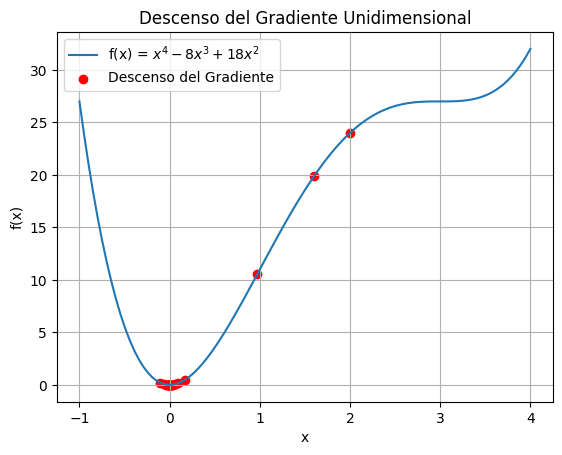

In [50]:
# Configuración del algoritmo de descenso del gradiente

x_inicial = 2.0
learning_rate = 0.05
numero_iteraciones = 50

# Aplicar el descenso del gradiente
trayectoria = descenso_gradiente_unidimensional(funcion_cuadratica, x_inicial, learning_rate, numero_iteraciones)

# Graficar la función y el descenso del gradiente
x_vals = np.linspace(-1, 4, 100)
y_vals = funcion_cuadratica(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = $x^4 - 8x^3 + 18x^2$')
plt.scatter(trayectoria, [funcion_cuadratica(x) for x in trayectoria], color='red', label='Descenso del Gradiente')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Descenso del Gradiente Unidimensional')
plt.grid(True)
plt.show()

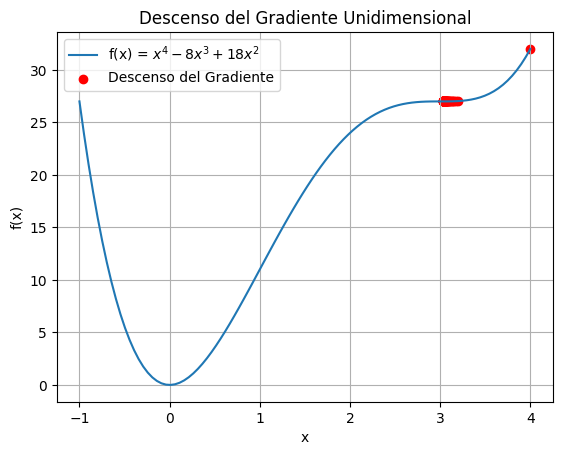

In [51]:
# Configuración del algoritmo de descenso del gradiente

x_inicial = 4.0
learning_rate = 0.05
numero_iteraciones = 50

# Aplicar el descenso del gradiente
trayectoria = descenso_gradiente_unidimensional(funcion_cuadratica, x_inicial, learning_rate, numero_iteraciones)

# Graficar la función y el descenso del gradiente
x_vals = np.linspace(-1, 4, 100)
y_vals = funcion_cuadratica(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = $x^4 - 8x^3 + 18x^2$')
plt.scatter(trayectoria, [funcion_cuadratica(x) for x in trayectoria], color='red', label='Descenso del Gradiente')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Descenso del Gradiente Unidimensional')
plt.grid(True)
plt.show()

### <!-- Subsection 2.2 -->
**<h3 id="subsection22" style="color: #003366;">2.2. Descenso del Gradiente en más de una Variable</h3>**

---
Descenso del gradiente multivariable

---

El descenso del gradiente multivariable es un método optimización utilizado en campos que van desde el aprendizaje automático hasta las ciencias naturales, diseñado para encontrar los mínimos locales o globales de una función multivariable. Este algoritmo es fundamental para la optimización de modelos y sistemas complejos en los cuales la función objetivo depende de múltiples variables.

En este caso, la función $f$ depende de $n$ variables tal que $f(X) = y$ donde $X = [x_1,x_2,...,x_n]$. El objetivo es encontrar el vector de variables $X^*$ que minimiza la función $f$.

El gradiente de $f$ en un punto $X$, denotado como $∇f(X)$, es un vector que apunta en la dirección de la máxima tasa de cambio de $f$ en ese punto concreto. Su componente i-ésima es la derivada parcial de $f$ con respecto a $x_i$.

$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
    \frac{\partial f}{\partial x_1} \\
    \frac{\partial f}{\partial x_2} \\
    \vdots \\
    \frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

El descenso del gradiente se basa en la idea de ajustar iterativamente las variables para reducir el valor de la función objetivo. La actualización en cada iteración se realiza en la dirección opuesta al gradiente, multiplicada por una tasa de aprendizaje $\alpha$. Así, el procedimiento algorítmico es idéntico al del caso univariado, solo que la regla de actualización de variables cambia a:

$$
  X^{(k+1)} = X^{(k)} - \alpha\nabla f|_{X=X^{(k)}}
$$

Este proceso se repite hasta que se alcanza una convergencia aceptable o se alcanza un número máximo de iteraciones.

Las derivadas parciales son conceptos fundamentales en cálculo diferencial que permiten medir cómo cambia una función de varias variables con respecto a cada una de esas variables individualmente. En lugar de considerar la tasa de cambio con respecto a todas las variables simultáneamente, las derivadas parciales se centran en una variable a la vez, manteniendo las demás constantes.

Por ejemplo, para la función $f(x,y) = x^2 + y^2$ el conjunto de derivadas parciales que conforman el vector gradiente son:

$$
\nabla f(x,y) = \begin{bmatrix}
    \frac{\partial f}{\partial x} \\
    \frac{\partial f}{\partial y} \\
\end{bmatrix} = \begin{bmatrix}
    2x \\
    2y \\
\end{bmatrix}
$$
Como podémos ver, el gradiente es un vector que se conforma en cada una de sus componentes, por la ***dirección tangente*** a la superficie con respecto a cada variable-dimensión. Ya que cada componente es una recta tangente que en si, puede verse como una dirección, podemos considerar tal dirección como un vector, por ende, éstos dos vectores podrán usarse para formar un plano el cual es tangente a la superficie en un punto de interés.

In [52]:
# Función bidimensional
def f(x, y):
    return x**2 + y**2

def df_dx(x, y):
    return 2 * x
def df_dy(x, y):
    return 2 * y

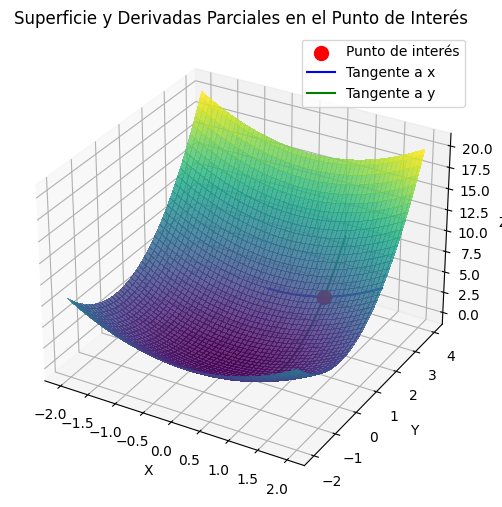

In [57]:
# Punto en el que calcularemos las derivadas parciales
x_0, y_0 = 1, 2

# Visualización de las derivadas parciales
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculamos la función f(x,y)
Z = f(X, Y)

# Gráfico de la superficie
superficie_linea_tangente(X,Y,f, df_dx, df_dy, x_0, y_0)

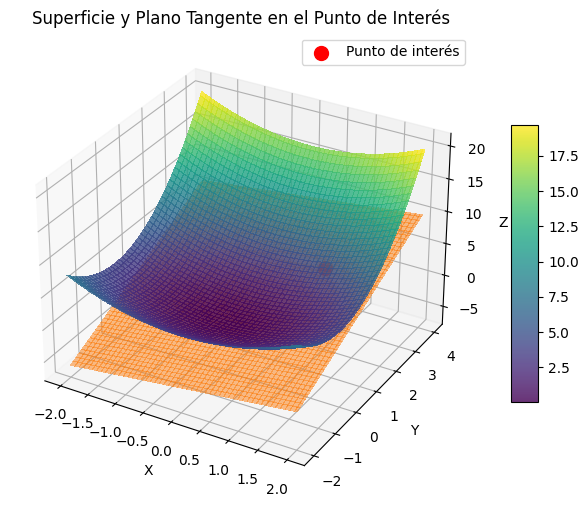

In [61]:
# Función bidimensional
def f(x, y):
    return x**2 + y**2

# Punto en el que calcularemos el plano tangente
x_0, y_0 = 1, 2

x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 4, 100)

# Calculamos el plano tangente
def tangential_plane(x, y, x_point, y_point):
    return f(x_point, y_point) + (x - x_point) + 2 * (y - y_point)

superficie_plano_tangente(x_vals, y_vals, f, x_0, y_0)

Teniendo en cuenta que un gradiente es una derivada multidimensional, procedamos a usar éstos conocimientos para encontrar el mínimo de una función bidimensional mediante el descenso del gradiente.

In [7]:
# Definición de una función bidimensional
def funcion(x):
    return x[0]**2 + x[1]**2

In [8]:
# Gradiente numérico: Calcula la derivada parcial numéricamente
def derivada_parcial(funcion, x, h=1e-6):

    gradiente = np.zeros_like(x)
    for i in range(len(x)):
        x_plus_h = x.copy()
        x_plus_h[i] += h
        gradiente[i] = (funcion(x_plus_h) - funcion(x)) / h
    return gradiente

In [9]:
# Descenso del gradiente multidimensional
def descenso_gradiente_multivariante(funcion, punto_inicial, tasa_aprendizaje, num_iteraciones):
    # Algoritmo de descenso del gradiente para una variable en dos dimensiones
    trayectoria = [punto_inicial]

    for _ in range(num_iteraciones):
        gradiente = derivada_parcial(funcion, punto_inicial)
        punto_inicial = punto_inicial - tasa_aprendizaje * gradiente
        trayectoria.append(punto_inicial)

    return np.array(trayectoria)

A continuación, observemos como el algoritmo, aunque simple en implementación, es lo suficientemente potente para hallar numéricamente los mínimos de la función multivariable.

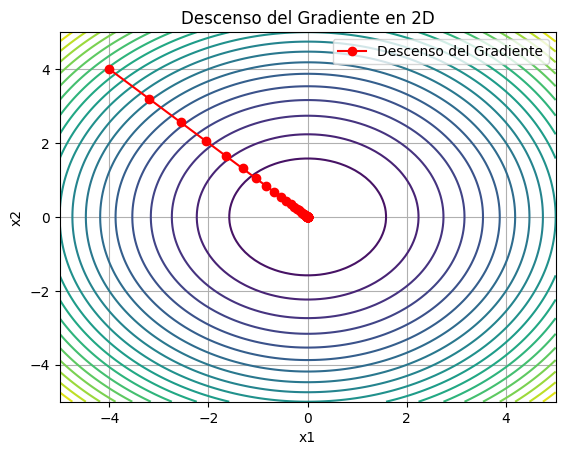

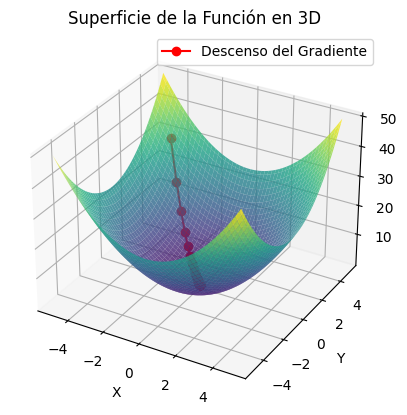

In [10]:
def nueva_funcion(x):
    # Nueva función con múltiples mínimos
    return x[0]**2 + x[1]**2

# Parámetros del algoritmo
punto_inicial = np.array([-4.0, 4.0])
tasa_aprendizaje = 0.1
num_iteraciones = 50

# Aplicar el descenso del gradiente
trayectoria_descenso = descenso_gradiente_multivariante(funcion, punto_inicial, tasa_aprendizaje, num_iteraciones)
z_trayectoria_descenso = [nueva_funcion(p) for p in trayectoria_descenso]

# Generar datos para la superficie
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = nueva_funcion([X, Y])

plot_contorno_dg_2d(X,Y,Z,trayectoria_descenso)
grafica_3d_dg(X,Y,Z,trayectoria_descenso, z_trayectoria_descenso)

No obstante, el descenso del gradiente como tal sigue siendo un algoritmo sensible a las condiciones iniciales, donde tanto el learning rate como el punto de inicialización son determinantes en el valor mínimo de la función que podrá ser alcanzado, ya que corresponde a un método de minimización local.

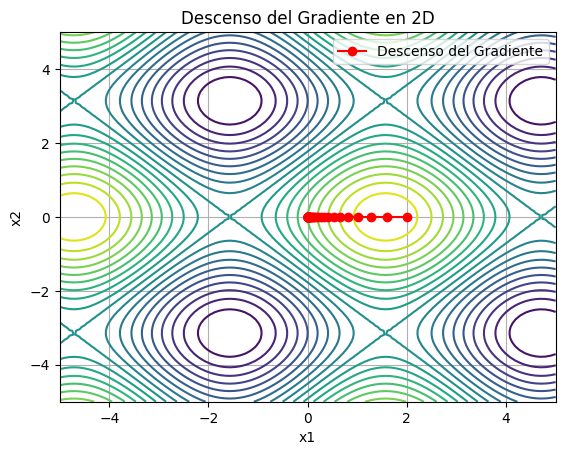

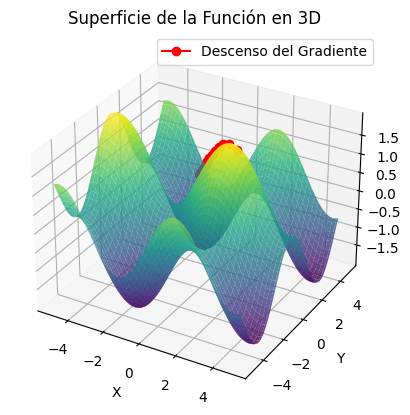

In [74]:
def nueva_funcion(x):
    # Nueva función con múltiples mínimos
    #return -(np.sin(x[0]) + np.cos(x[1]**2/3))**2
    #return -(np.sin(x[0]) + np.cos(x[1]**2/3))**2
    #return -(np.sin(x[0]) + np.cos(x[1]/3))
    return np.sin(x[0]) + np.cos(x[1])

# Parámetros del algoritmo
punto_inicial = np.array([2.0, 0.0])
tasa_aprendizaje = 0.1
num_iteraciones = 100

# Aplicar el descenso del gradiente
trayectoria_descenso = descenso_gradiente_multivariante(funcion, punto_inicial, tasa_aprendizaje, num_iteraciones)
z_trayectoria_descenso = [nueva_funcion(p) for p in trayectoria_descenso]

# Generar datos para la superficie
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = nueva_funcion([X, Y])

plot_contorno_dg_2d(X,Y,Z,trayectoria_descenso)
grafica_3d_dg(X,Y,Z,trayectoria_descenso, z_trayectoria_descenso)

# <!-- Section 3 -->
**<h2 id="section3" style="color: #007ACC;">3. Regresión Lineal</h2>**

---
Aplicación del cálculo diferencial y el álgebra lineal en Machine Learning e Inteligencia Artificial

---

El Álgebra Lineal y el Cálculo Diferecial forman una tupla inseparable en el campo de las matemáticas aplicadas y constituyen la espina dorsal de todo el aprendizaje automático (Machine Learning) contemporáneo y en general de la Inteligencia Artificial como disciplina. El Álgebra lineal proporciona las herramientas para representar, manipular y entender las estructuras de los datos, mientras que el Cálculo Diferencial permite la optimización de modelos y la comprensión de cómo cambian las funciones del modelo con respecto a sus variables o "features". Más aún, ambas disciplinas trabajan en conjunto para desarrollar algoritmos, modelar fenómenos y mejorar el rendimiento de los sistemas en Machine Learning e Inteligencia Artificial.

En la presente sección, ilustraremos el por qué éstas dos disciplinas son inseparables. En términos simples, si la creación de un modelo de aprendizaje automático corresponde a entrenar el modelo con base a datos, es decir, ajustar los parámetros del modelo matemático que mejor se ajústen a los datos, ésta construcción se dará con base a las herramientas del álgebra lineal y el cálculo. Donde el álgebra nos permitirá manipular y representar los datos mientras que el cálculo nos permitirá entrenar el modelo.

### <!-- Subsection 3.1 -->
**<h3 id="subsection31" style="color: #003366;">3.1. Función de Costo</h3>**

---
La regresión lineal

---

Dentro del Machine Learning, la tarea de regresión es un tipo de aprendizaje supervizado que establece la relación entre una variable objetivo ***numérica** **y**  y las variables independientes o explicativas. Los modelos de regresión pueden ser simples o múltiples (de una o más variables). En la presente sección, ilustraremos el proceso mediante el cuál podémos hallar una regresión lineal mediante optimización numérica usando el descenso del gradiente. Los elementos escenciales dentro de una tarea de regresión son:

* Conjunto de datos con etiquetas numéricas:
$$
D = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(m)}, y^{(m)})\}
$$
* Definición del vector de características:
$$
x^{(i)} = \begin{bmatrix} x_1^{(i)} \\ x_2^{(i)} \\ \vdots \\ x_n^{(i)} \end{bmatrix}
$$

* Definición de la variable objetivo como números:
$$
y_i \in \mathbb{R}
$$

* Definición de un modelo matemático o función que permita establecer la relación entre las características y la variable objetivo:
$$
y = f(x)
$$

---
Modelo lineal y función de Pérdida (MSE)

---

En machine learning, una función de pérdida (también conocida como función objetivo o función de costo) mide la discrepancia entre las predicciones de un modelo y los valores reales. El objetivo principal es minimizar esta función, ya que un valor menor de la función de pérdida indica que el modelo está haciendo predicciones más cercanas a los valores reales. En el contexto de una tarea de regresión lineal, la función de pérdida cuadrática es comúnmente utilizada (MSE - Mean Squared Error por sus siglas en inglés).

Supongamos que tenemos un conjunto de datos de regresión con $m$ ejemplos etiquetados (poseemos una variable objetivo) tal que $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(m)}, y^{(m)})\}$, donde $x^{(i)}$ son las características y $y^{(i)}$ son las etiquetas, es decir, el número a predecir.

La tarea de regresión lineal es encontrar una función lineal $f(x)$ que minimice la diferencia entre las predicciones y las etiquetas reales. El modelo lineal y la función de error se definen respectivamente cómo:

* Función lineal dependiente de los parámetros $w$ y $b$:
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b $$

* Función de perdia o error cuadrático medio, donde $\theta = [w,b]$ es el conjunto de parámetros del modelo:
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2
$$


El modelo lineal que emplearémos en esta sección será una regresión será un modelo lineal univariado que dependerá de características $x$ tal que $x^{(i)}=a$ con  $a$ un número real (en escencia, el vector de características está constituído por solo una característica). Por ende, el modelo que representará el comportamiento de los datos se puede calcular de la siguiente manera:

In [4]:
# Modelo lineal simple (x son números y no vectores)
def f_lineal(x ,w, b):
  m = x.shape[0]
  f_wb = np.zeros(m)

  for i in range(m):
    f_wb[i] = w * x[i] + b
  return f_wb

In [5]:
# Función de error MSE
def J_cost(x, y_real, w, b):
  m = x.shape[0]
  suma_error = 0

  for i in range(m):
    y_pred = w * x[i] + b
    costo = (y_pred - y_real[i])**2
    suma_error = suma_error + costo

  costo_total = (1/(2*m)) * suma_error

  return costo_total

### <!-- Subsection 3.2 -->
**<h3 id="subsection32" style="color: #003366;">3.2. Optimización de la función de costo</h3>**

---
Optimización de un modelo de regresión lineal

---

Una vez construidas las expresiones para el modelo lineal y su función de error, procederemos a crear un conjunto de datos artificiales que sigan una correlación lineal y nuestro objetivo será optimizar la función de costo de modo tal que cuando determinemos su valor mínimo, éste valor nos dirá cuales son los valores de los parámetros $w$ y $b$ que mejor se ajustan a los datos.

In [6]:
# Generación de datos artificiales
np.random.seed(13)

x = np.linspace(-2,10,200)
ruido = (np.random.normal(1,0.5,len(x)))
y =  (3 * x + ruido) + 5 * ruido

data = pd.DataFrame({'Features': x , "Target": y })
data

,Features,Target
0,-2.000000,-2.137172
1,-1.939698,2.442204
2,-1.879397,0.228300
3,-1.819095,1.898151
4,-1.758794,4.758923
...,...,...
195,9.758794,34.911143
196,9.819095,34.132750
197,9.879397,38.503931
198,9.939698,35.879008


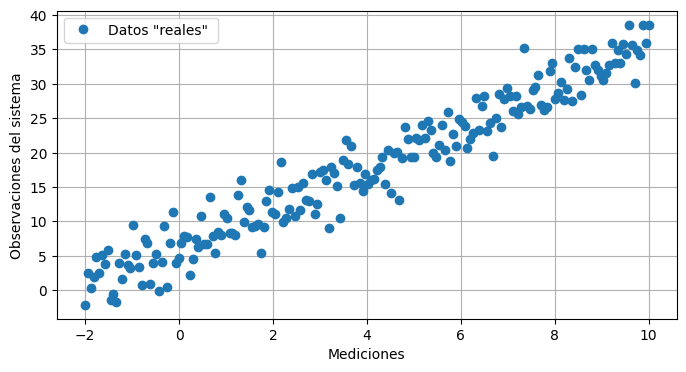

In [7]:
plt.figure(figsize=(8,4))
plt.plot(x, y, marker ='o', linestyle='None',)
plt.xlabel('Mediciones')
plt.ylabel('Observaciones del sistema')
plt.legend(['Datos "reales" '])
plt.grid(True)
plt.show()

En la sección anterior vimos que el descenso del gradiente multivariado se basa en la siguiente regla de actualiazción:

$$
  X^{(k+1)} = X^{(k)} - \alpha\nabla f|_{X=X^{(k)}}
$$

Nuestro problema de regresión lineal simple resulta ser en efecto, una aplicación del descenso del gradiente multivariable ya que al ser $J$ la función que queremos minimizar, ésta depende de dos parámetros ("variables") $w$ y $b$. De éste modo tenémos que ejecutar dos actualizaciones, una para $w$ y otra para $b$ tal que:

$$
\nabla J(w,b) = \begin{bmatrix}
    \frac{\partial J}{\partial x} \\
    \frac{\partial J}{\partial y} \\
\end{bmatrix}
$$

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\\
\end{align}
$$

Donde la regla de actualización es:

$$\begin{align*}
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  
\end{align*}$$


In [8]:
# Gradiente de una función de pérdida de un modelo lineal
def J_grad(x, y, w, b):
  m = x.shape[0]
  dj_db = 0
  dj_dw = 0

  for i in range(m):
    # Calculamos el gradiente para cada punto de x y y
    f_wb = w * x[i] + b
    dj_dw_i = ( f_wb - y[i] ) * x[i]
    dj_db_i = ( f_wb - y[i] )

    # Calculamos el promedio de los gradientes
    dj_dw += dj_dw_i
    dj_db += dj_db_i
    
  dj_dw = dj_dw / m
  dj_db = dj_db /m

  return dj_dw, dj_db

In [9]:
# Ciclo del Gradiente descendente

def descenso_del_gradiente(x, y, w_in, b_in, alpha, num_iter, funcion_costo, funcion_gradiente):

  J_historia = []
  p_historia = []
  
  b = b_in
  w = w_in

  for i in range(num_iter):
    # Se calcula el gradiente y se actualizan los parametros
    dj_dw, dj_db = funcion_gradiente(x, y, w, b)

    # Actualización de parámetros
    b = b - alpha * dj_db
    w = w - alpha * dj_dw

    # Se registra la historia del costo
    if i < 1000000:
      J_historia.append( funcion_costo(x, y, w, b) )
      p_historia.append( [w,b] )

    # Imprimimos el costo actual en intervalos de 10
    if i% math.ceil(num_iter/10) == 0:

      print(f"Iteration {i}: Cost {J_historia[-1]} ",
            f"dj_dw: {dj_dw}, dj_db: {dj_db}  ",
            f"w: {w}, b:{b}")

  return w, b, J_historia, p_historia


In [10]:
# Split de los datos en entrenamiento (train) y validación (test)
X = data['Features'].values
y = data['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iteraciones = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = descenso_del_gradiente(X_train ,y_train, w_init, b_init, tmp_alpha,
                                                          iteraciones, J_cost, J_grad)
print(f"(w,b) Resultado del gradiente descendente: ({w_final:8.4f},{b_final:8.4f})")

Iteration 0: Cost 112.63695895668451  dj_dw: -107.34058319770608, dj_db: -17.667584183929883   w: 1.0734058319770607, b:0.17667584183929883
Iteration 1000: Cost 3.6094044521769115  dj_dw: 0.004281288728043686, dj_db: -0.030266684636799258   w: 2.9238348471464404, b:6.017043074075778
Iteration 2000: Cost 3.608346823310492  dj_dw: 5.320929113941109e-05, dj_db: -0.0003761645001924219   w: 2.9142199306650607, b:6.085015982103427
Iteration 3000: Cost 3.60834665994542  dj_dw: 6.61302900339944e-07, dj_db: -4.6750984766696925e-06   w: 2.9141004332607032, b:6.085860772184722
Iteration 4000: Cost 3.6083466599201865  dj_dw: 8.218902336487588e-09, dj_db: -5.8103688116428744e-08   w: 2.914098948106913, b:6.085871271518979
Iteration 5000: Cost 3.6083466599201817  dj_dw: 1.021563833525363e-10, dj_db: -7.221306108640135e-10   w: 2.9140989296489246, b:6.0858714020082205
Iteration 6000: Cost 3.6083466599201817  dj_dw: 1.267885796352175e-12, dj_db: -8.974598841859915e-12   w: 2.914098929419522, b:6.08587

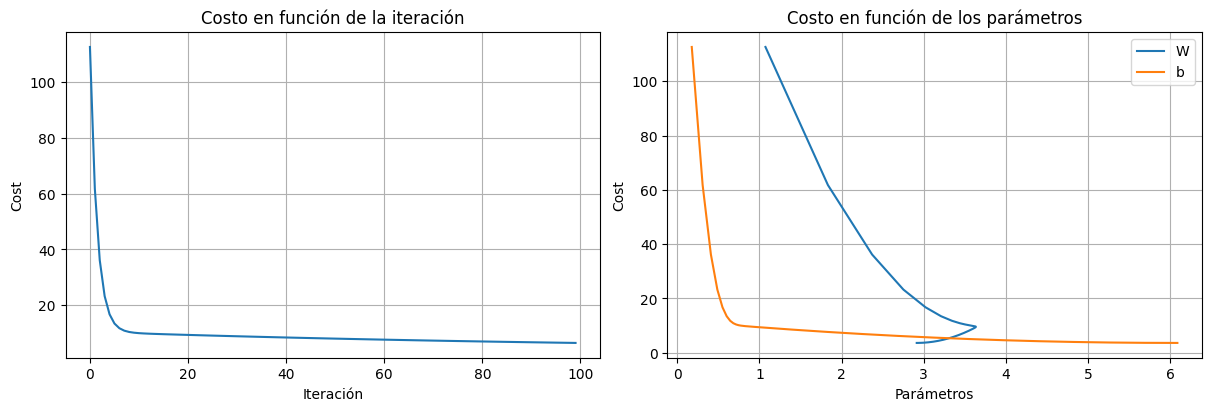

In [12]:
# Plot del entrenamiento

w_historia = [p[0] for p in p_hist]
b_historia = [p[1] for p in p_hist]
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# Graficar en ax1
ax1.plot(J_hist[:100])
ax1.set_title("Costo en función de la iteración")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteración')
ax1.grid()

# Graficar en ax2
ax2.plot(w_historia, J_hist, label='W')
ax2.plot(b_historia, J_hist, label='b')

ax2.set_title("Costo en función de los parámetros")
ax2.set_ylabel('Cost')
ax2.set_xlabel('Parámetros')
ax2.grid()
ax2.legend()  # Añadir leyenda

plt.show()


In [13]:
# Resultados
resultados = {
    'w':w_final, 'b':b_final, 'error_test': J_cost(X_test, y_test, w_final, b_final)
}
resultados = pd.DataFrame(resultados, index=[0])
resultados

,w,b,error_test
0,2.914099,6.085871,2.821721


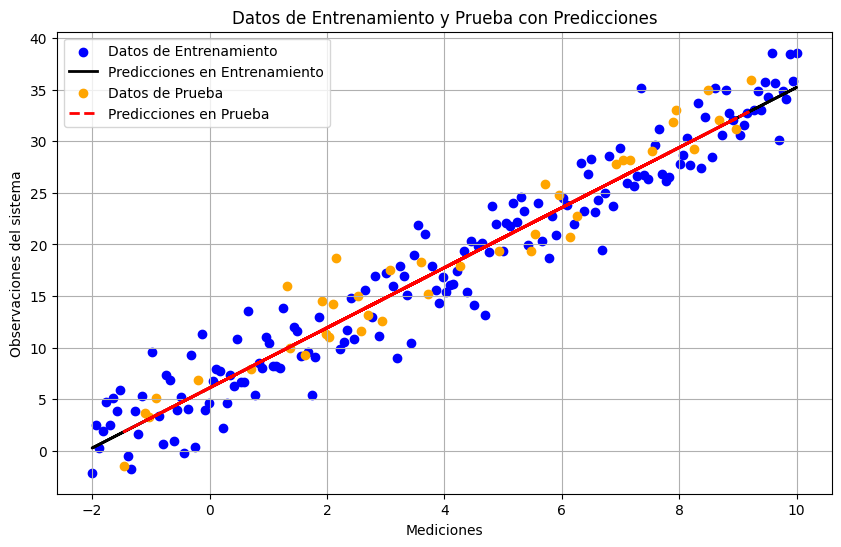

In [15]:
# Predicciones del modelo
y_train_pred = f_lineal(X_train , w_final, b_final)
y_test_pred = f_lineal(X_test , w_final, b_final)

# Graficar los datos de entrenamiento y predicciones en rojo
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento')
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label='Predicciones en Entrenamiento')

# Graficar los datos de prueba y predicciones en verde
plt.scatter(X_test, y_test, color='orange', label='Datos de Prueba')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, linestyle='dashed', label='Predicciones en Prueba')

# Añadir etiquetas y título al gráfico
plt.title('Datos de Entrenamiento y Prueba con Predicciones')
plt.xlabel('Mediciones')
plt.ylabel('Observaciones del sistema')
plt.legend()
plt.grid(True)
# Mostrar el gráfico
plt.show()

**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Nicolás Castillo Ojeda

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---